(ar1)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# {index}`AR1 Processes <single: AR1 Processes>`

```{contents} Contents
:depth: 2
```

## Overview

In this lecture we are going to study a very simple class of stochastic
models called AR(1) processes.

These simple models are used again and again in economic research to represent the dynamics of series such as

* labor income
* dividends
* productivity, etc.

AR(1) processes can take negative values but are easily converted into positive processes when necessary by a transformation such as exponentiation.

We are going to study AR(1) processes partly because they are useful and
partly because they help us understand important concepts.

In [1]:
using LinearAlgebra, Statistics
using Distributions, LaTeXStrings, Plots

## The AR(1) Model

The **AR(1) model** (autoregressive model of order 1) takes the form

```{math}
:label: can_ar1

X_{t+1} = a X_t + b + c W_{t+1}
```

where $a, b, c$ are scalar-valued parameters.

This law of motion generates a time series $\{ X_t\}$ as soon as we
specify an initial condition $X_0$.

This is called the **state process** and the state space is $\mathbb R$.

To make things even simpler, we will assume that

* the process $\{ W_t \}$ is IID and standard normal,
* the initial condition $X_0$ is drawn from the normal distribution $N(\mu_0, v_0)$ and
* the initial condition $X_0$ is independent of $\{ W_t \}$.

### Moving Average Representation

Iterating backwards from time $t$, we obtain

$$
X_t = a X_{t-1} + b +  c W_t
        = a^2 X_{t-2} + a b + a c W_{t-1} + b + c W_t
        = \cdots
$$

If we work all the way back to time zero, we get

```{math}
:label: ar1_ma

X_t = a^t X_0 + b \sum_{j=0}^{t-1} a^j +
        c \sum_{j=0}^{t-1} a^j  W_{t-j}
```

Equation {eq}`ar1_ma` shows that $X_t$ is a well defined random variable, the value of which depends on

* the parameters,
* the initial condition $X_0$ and
* the shocks $W_1, \ldots W_t$ from time $t=1$ to the present.

Throughout, the symbol $\psi_t$ will be used to refer to the
density of this random variable $X_t$.

### Distribution Dynamics

One of the nice things about this model is that it's so easy to trace out the sequence of distributions $\{ \psi_t \}$ corresponding to the time
series $\{ X_t\}$.

To see this, we first note that $X_t$ is normally distributed for each $t$.

This is immediate from {eq}`ar1_ma`, since linear combinations of independent
normal random variables are normal.

Given that $X_t$ is normally distributed, we will know the full distribution
$\psi_t$ if we can pin down its first two moments.

Let $\mu_t$ and $v_t$ denote the mean and variance
of $X_t$ respectively.

We can pin down these values from {eq}`ar1_ma` or we can use the following
recursive expressions:

```{math}
:label: dyn_tm

\mu_{t+1} = a \mu_t + b
\quad \text{and} \quad
v_{t+1} = a^2 v_t + c^2
```

These expressions are obtained from {eq}`can_ar1` by taking, respectively, the expectation and variance of both sides of the equality.

In calculating the second expression, we are using the fact that $X_t$
and $W_{t+1}$ are independent.

(This follows from our assumptions and {eq}`ar1_ma`.)

Given the dynamics in {eq}`ar1_ma` and initial conditions $\mu_0,
v_0$, we obtain $\mu_t, v_t$ and hence

$$
\psi_t = N(\mu_t, v_t)
$$

The following code uses these facts to track the sequence of marginal
distributions $\{ \psi_t \}$.

The parameters are

In [2]:
a = 0.9
b = 0.1
c = 0.5

# initial conditions mu_0, v_0
mu = -3.0
v = 0.6 

0.6

Here's the sequence of distributions:

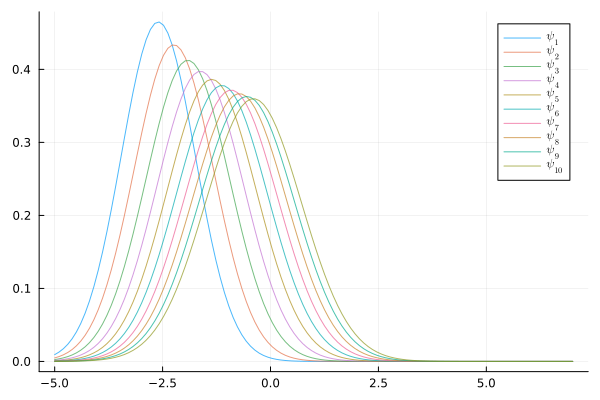

In [3]:
using StatsPlots

sim_length = 10
x_grid = range(-5, 7, length = 120)

plt = plot()
for t in 1:sim_length
    mu = a * mu + b
    v = a^2 * v + c^2
    dist = Normal(mu, sqrt(v))
    plot!(plt, x_grid, pdf.(dist, x_grid), label=L"\psi_{%$t}", linealpha=0.7)
end
plt

## Stationarity and Asymptotic Stability

Notice that, in the figure above, the sequence $\{ \psi_t \}$ seems to be converging to a limiting distribution.

This is even clearer if we project forward further into the future:

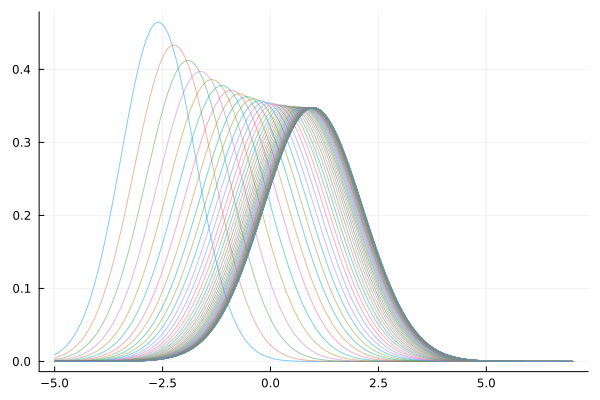

In [4]:
function plot_density_seq(mu_0=-3.0, v_0=0.6; sim_length=60)
    mu = mu_0
    v = v_0
    plt = plot()
    for t in 1:sim_length
        mu = a * mu + b
        v = a^2 * v + c^2
        dist = Normal(mu, sqrt(v))
        plot!(plt, x_grid, pdf.(dist, x_grid), label=nothing, linealpha=0.5)
    end
    return plt
end

plot_density_seq()

Moreover, the limit does not depend on the initial condition.

For example, this alternative density sequence also converges to the same limit.

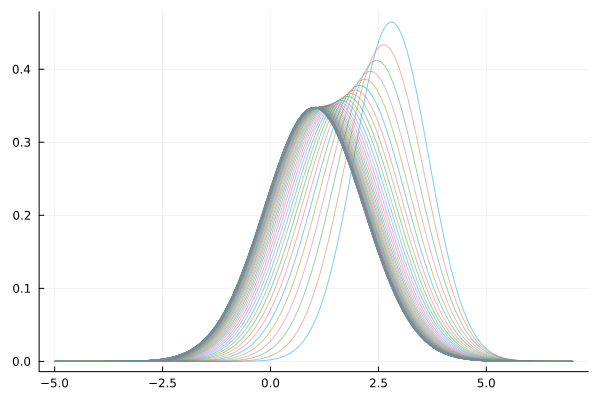

In [5]:
plot_density_seq(3.0)

In fact it's easy to show that such convergence will occur, regardless of the initial condition, whenever $|a| < 1$.

To see this, we just have to look at the dynamics of the first two moments, as
given in {eq}`dyn_tm`.

When $|a| < 1$, these sequences converge to the respective limits

```{math}
:label: mu_sig_star

\mu^* := \frac{b}{1-a}
\quad \text{and} \quad
v^* = \frac{c^2}{1 - a^2}
```

(See our {doc}`lecture on one dimensional dynamics <scalar_dynam>` for background on deterministic convergence.)

Hence

```{math}
:label: ar1_psi_star

\psi_t \to \psi^* = N(\mu^*, v^*)
\quad \text{as }
t \to \infty
```

We can confirm this is valid for the sequence above using the following code.

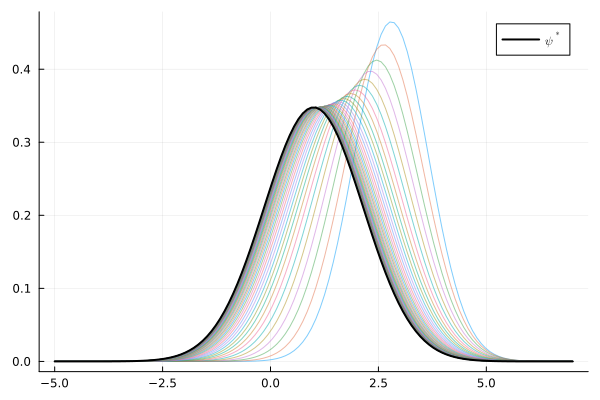

In [6]:
plt = plot_density_seq(3.0)

mu_star = b / (1 - a)
std_star = sqrt(c^2 / (1 - a^2))  # square root of v_star
psi_star = Normal(mu_star, std_star)
plot!(plt, x_grid, psi_star, color = :black, label=L"\psi^*", linewidth=2)
plt

As claimed, the sequence $\{ \psi_t \}$ converges to $\psi^*$.

### Stationary Distributions

A stationary distribution is a distribution that is a fixed
point of the update rule for distributions.

In other words, if $\psi_t$ is stationary, then $\psi_{t+j} =
\psi_t$ for all $j$ in $\mathbb N$.

A different way to put this, specialized to the current setting, is as follows: a
density $\psi$ on $\mathbb R$ is **stationary** for the AR(1) process if

$$
X_t \sim \psi
\quad \implies \quad
a X_t + b + c W_{t+1} \sim \psi
$$

The distribution $\psi^*$ in {eq}`ar1_psi_star` has this property ---
checking this is an exercise.

(Of course, we are assuming that $|a| < 1$ so that $\psi^*$ is
well defined.)

In fact, it can be shown that no other distribution on $\mathbb R$ has this property.

Thus, when $|a| < 1$, the AR(1) model has exactly one stationary density and that density is given by $\psi^*$.

## Ergodicity

The concept of ergodicity is used in different ways by different authors.

One way to understand it in the present setting is that a version of the Law
of Large Numbers is valid for $\{X_t\}$, even though it is not IID.

In particular, averages over time series converge to expectations under the
stationary distribution.

Indeed, it can be proved that, whenever $|a| < 1$, we have

```{math}
:label: ar1_ergo

\frac{1}{m} \sum_{t = 1}^m h(X_t)  \to
\int h(x) \psi^*(x) dx
    \quad \text{as } m \to \infty
```

whenever the integral on the right hand side is finite and well defined.

Notes:

* In {eq}`ar1_ergo`, convergence holds with probability one.
* The textbook by {cite}`MeynTweedie2009` is a classic reference on ergodicity.

For example, if we consider the identity function $h(x) = x$, we get

$$
\frac{1}{m} \sum_{t = 1}^m X_t  \to
\int x \psi^*(x) dx
    \quad \text{as } m \to \infty
$$

In other words, the time series sample mean converges to the mean of the
stationary distribution.

As will become clear over the next few lectures, ergodicity is a very
important concept for statistics and simulation.

## Exercises

(ar1p_ex1)=
### Exercise 1

Let $k$ be a natural number.

The $k$-th central moment of a  random variable is defined as

$$
M_k := \mathbb E [ (X - \mathbb E X )^k ]
$$

When that random variable is $N(\mu, \sigma^2)$, it is known that

$$
M_k =
\begin{cases}
    0 & \text{ if } k \text{ is odd} \\
    \sigma^k (k-1)!! & \text{ if } k \text{ is even}
\end{cases}
$$

Here $n!!$ is the double factorial.

According to {eq}`ar1_ergo`, we should have, for any $k \in \mathbb N$,

$$
\frac{1}{m} \sum_{t = 1}^m
    (X_t - \mu^* )^k
    \approx M_k
$$

when $m$ is large.

Confirm this by simulation at a range of $k$ using the default parameters from the lecture.

(ar1p_ex2)=
### Exercise 2

Write your own version of a one dimensional [kernel density
estimator](https://en.wikipedia.org/wiki/Kernel_density_estimation),
which estimates a density from a sample.

Write it as a function $f$ that takes the data $X$ and bandwidth
$h$ such that

$$
f(x) = \frac{1}{hn} \sum_{i=1}^n
K \left( \frac{x-X_i}{h} \right)
$$

For $K$ use the Gaussian kernel ($K$ is the standard normal
density).

To set the bandwidth, use Silverman’s rule (see
the “rule of thumb” discussion on [this
page](https://en.wikipedia.org/wiki/Kernel_density_estimation)). Test
the function you have written by going through the steps

1. simulate data $X_1, \ldots, X_n$ from distribution $\phi$
1. plot the kernel density estimate over a suitable range
1. plot the density of $\phi$ on the same figure

for distributions $\phi$ of the following types

- [beta
  distribution](https://en.wikipedia.org/wiki/Beta_distribution)
  with $\alpha = \beta = 2$
- [beta
  distribution](https://en.wikipedia.org/wiki/Beta_distribution)
  with $\alpha = 2$ and $\beta = 5$
- [beta
  distribution](https://en.wikipedia.org/wiki/Beta_distribution)
  with $\alpha = \beta = 0.5$

Use $n=500$.

Make a comment on your results. (Do you think this is a good estimator
of these distributions?)

(ar1p_ex3)=
### Exercise 3

In the lecture we discussed the following fact: for the $AR(1)$ process

$$
X_{t+1} = a X_t + b + c W_{t+1}
$$

with $\{ W_t \}$ iid and standard normal,

$$
\psi_t = N(\mu, s^2) \implies \psi_{t+1}
= N(a \mu + b, a^2 s^2 + c^2)
$$

Confirm this, at least approximately, by simulation. Let

- $a = 0.9$
- $b = 0.0$
- $c = 0.1$
- $\mu = -3$
- $s = 0.2$

First, plot $\psi_t$ and $\psi_{t+1}$ using the true
distributions described above.

Second, plot $\psi_{t+1}$ on the same figure (in a different
color) as follows:

1. Generate $n$ draws of $X_t$ from the $N(\mu, s^2)$
   distribution
1. Update them all using the rule
   $X_{t+1} = a X_t + b + c W_{t+1}$
1. Use the resulting sample of $X_{t+1}$ values to produce a
   density estimate via kernel density estimation.

Try this for $n=2000$ and confirm that the
simulation based estimate of $\psi_{t+1}$ does converge to the
theoretical distribution.

## Solutions

### Exercise 1

Here is one solution:

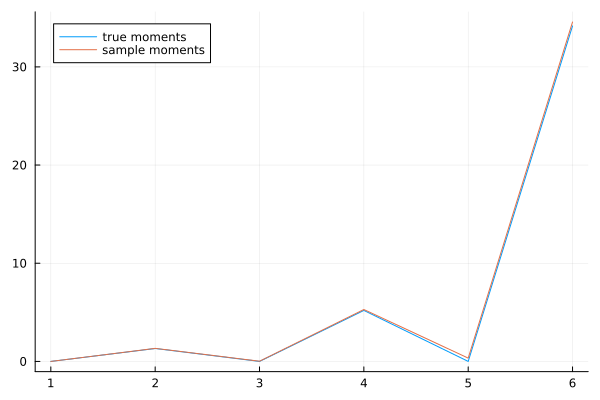

In [7]:
using Random

a = 0.9
b = 0.1
c = 0.5
mu_star = b / (1 - a)
std_star = sqrt(c^2 / (1 - a^2))  # square root of v_star

function sample_moments_ar1(k, m=100_000, mu_0=0.0, sigma_0=1.0; seed=1234)
    Random.seed!(seed)
    sample_sum = 0.0
    x = mu_0 + sigma_0 * randn()
    for t in 1:m
        sample_sum += (x - mu_star)^k
        x = a * x + b + c * randn()
    end
    return sample_sum / m
end

function double_factorial(n)
    return prod(1:2:n)
end

function true_moments_ar1(k)
    if k % 2 == 0
        return std_star^k * double_factorial(k - 1)
    else
        return 0
    end
end

k_vals = collect(1:6)
sample_moments = zeros(6)
true_moments = zeros(6)

for (k_idx, k) in enumerate(k_vals)
    sample_moments[k_idx] = sample_moments_ar1(k)
    true_moments[k_idx] = true_moments_ar1(k)
end

plt = plot()
plot!(plt, k_vals, true_moments, label="true moments")
plot!(plt, k_vals, sample_moments, label="sample moments")
plt

### Exercise 2

Here is one solution:

In [8]:
K(x) = pdf.(Normal(), x)

function f(x_val, x_data, h)
    return (1 / h) * mean(K((x_val .- x_data) / h))
end

f (generic function with 1 method)

In [9]:
function plot_kde(ϕ, n, plt, idx; x_min=-0.2, x_max=1.2)
    x_data = rand(ϕ, n)
    x_grid = range(-0.2, 1.2, length = 100)
    c = std(x_data)
    h = 1.06 * c * n^(-1/5)
    plot!(plt[idx], x_grid, f.(x_grid, Ref(x_data), h), label="estimate")
    plot!(plt[idx], x_grid, pdf.(ϕ, x_grid), label="true density")
    return plt
end

plot_kde (generic function with 1 method)

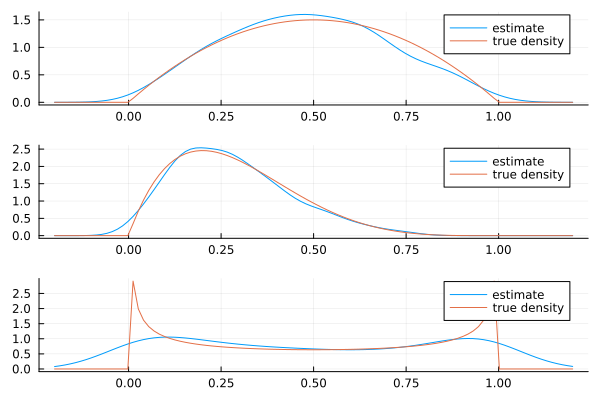

In [10]:
n = 500
parameter_pairs = [(2, 2), (2, 5), (0.5, 0.5)]
plt = plot(layout = (3, 1))
for (idx, (α, β)) in enumerate(parameter_pairs)
    plot_kde(Beta(α, β), n, plt, idx)
end
plt

We see that the kernel density estimator is effective when the underlying
distribution is smooth but less so otherwise.

### Exercise 3

Here is our solution:

In [11]:
a = 0.9
b = 0.0
c = 0.1
μ = -3
s = 0.2

μ_next = a * μ + b
s_next = sqrt(a^2 * s^2 + c^2)

ψ = Normal(μ, s)
ψ_next = Normal(μ_next, s_next)

Normal{Float64}(μ=-2.7, σ=0.20591260281974003)

In [12]:
K(x) = pdf.(Normal(), x)

function f(x_val, x_data, h)
    return (1 / h) * mean(K((x_val .- x_data) / h))
end

f (generic function with 1 method)

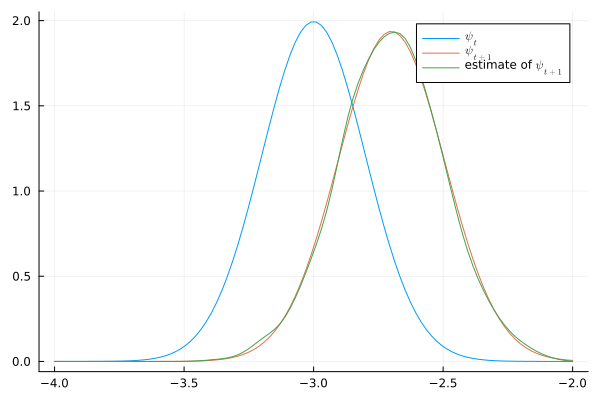

In [13]:
n = 2000
x_draws = rand(ψ, n)
x_draws_next = a * x_draws .+ b + c * randn(n)
c = std(x_draws_next)
h = 1.06 * c * n^(-1/5)

x_grid = range(μ - 1, μ + 1, length = 100)
plt = plot()

plot!(plt, x_grid, pdf.(ψ, x_grid), label=L"$\psi_t$")
plot!(plt, x_grid, pdf.(ψ_next, x_grid), label=L"$\psi_{t+1}$")
plot!(plt, x_grid, f.(x_grid, Ref(x_draws_next), h), label=L"estimate of $\psi_{t+1}$")

plt

The simulated distribution approximately coincides with the theoretical
distribution, as predicted.